In [1]:
from clean_corpus import *
from process_corpus import *
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix

# 1. Clean Corpus

### Load sentence files (extracted from Neuroimage & Neuroimage Clinical corpus)

In [2]:
file_specification='MNI_sentences_includesWordBoundaries'
keyword_sentences=load_keyword_sentences(file_specification)

*** loading: sentence_data/MNI_sentences_NeuroimageClinical_includesWordBoundaries.p
*** loading: sentence_data/MNI_sentences_Neuroimage_includesWordBoundaries.p


### Preprocess corpus

In [3]:
sentences=flatten_list(keyword_sentences) #this just let's us knows how many sentences in total we have
corpus=flatten_list_keepDocRelation(keyword_sentences) #
corpus=remove_punctuation(corpus)
corpus=remove_numbers(corpus)
corpus=remove_singleLetters(corpus)
corpus=strip_accents(corpus) 
corpus=word_stemming(corpus,stemmer='wordnet')
corpus=remove_singleLetters(corpus)
print('*** Identified', len(corpus),' articles containing', len(sentences), 'sentences containings the term "MNI"')

*** stemming with wordnet
*** Identified 6084  articles containing 14870 sentences containings the term "MNI"


### Inspect cleaned corpus

In [4]:
for article in range(7):
    print(corpus[article])
    print('********************************************************') 

registration from fmri to structural space wa carried out using flirt jenkinson et al and fmri data were warped to mni space via the high resolution structural volume using fnirt http fsl fmrib ox ac uk fsl fslwiki fnirt
********************************************************
functional volume were realigned to the anatomical image spatially normalized to the montreal neurological institute mni template and smoothed with mm gaussian kernel meta analysis of neuroimaging study returned significant neurosynth automatically threshold meta analytic result to correct for multiple comparison using false discovery rate fdr of cluster in the left dlpfc mni coordinate and right dlpfc coordinate
********************************************************
visualisation to visualise the resection mask we first linearly registered the preoperative to the mni brain template using fsl flirt to generate transformation matrix next we nonlinearly registered the preoperative weighted image to the mni templa

# 2. Compute word x document count matrix

### Define stop words

In [5]:
stop_words = stopwords.words('english') #nlkt defined stopwords
additional_stop_words=['http','ac','co','uk','www','ca','de','et','al','ion','fil','cam','wa', 'use', 'using', 'used', 'non', 'onto', 'fig', 'figure', 'supplementary', 'given', 'see', 'ant', 'ic', 'ba', 'based', 'included', 'fa'] #additional stopwords 
stop_words.extend(additional_stop_words)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Define vocabulary

In [6]:
N_occurance=10 # this defines how many times a word has to occur in the corpus to become vocabulary
wordfreq=get_wordfreq(corpus)
vocabulary=get_above_n_occurances(wordfreq,N_occurance)
vocabulary=filter_stopwords(vocabulary,stop_words) #remove stop words from vocabulary
print('*** Number of words in vocabulary:', len(vocabulary))

*** Number of words in vocabulary: 2324


### Compute word-by-document count matrix 

In [25]:
dense_count=compute_count_matrix(corpus,vocabulary,type='wordxdoc')
sparse_count=csr_matrix(dense_count) #get into sparse format
df_count=return_df(dense_count,vocabulary) #bring into dataframe format - just for ease of visualisation
print(f"Article count matrix size: {df_count.shape}")
df_count.head(10)

*** computing word x document count matrix
Article count matrix size: (2324, 6084)


,0,1,2,3,4,5,6,7,8,9,...,6074,6075,6076,6077,6078,6079,6080,6081,6082,6083
aal,0,0,0,0,0,0,1,0,0,0,...,0,2,0,0,0,0,0,0,0,0
abbreviation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abnormal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abnormality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accordance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Run Latent Dirichlet allocation (LDA)

### Select optimal number of LDA components using perplexity measure (the lower the better)

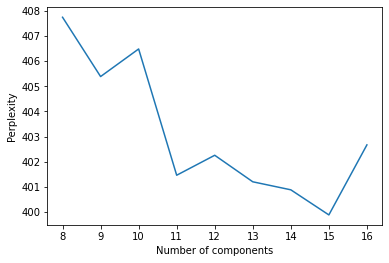

In [8]:
range_components = list(range(8, 17))
perplexity=perplexity_over_components(sparse_count,range_components)
make_perplexity_over_components_plot(perplexity,range_components)

### Compute LDA with optimal number of components

In [9]:
n_components=range_components[np.argmin(perplexity)] #select number of components with lowest perplexity number
lda_model = LatentDirichletAllocation(n_components=n_components,random_state=122)
lda_model.fit(sparse_count)

LatentDirichletAllocation(n_components=15, random_state=122)

### Make wordcloud plot for paper

In [23]:
def make_wordcloud_plot(
    lda_model,
    terms,
    stop_words,
    sparse_count,
    corpus,
    output_filename,
    ncols=4,
    clip_topics=None,
):
    """Generate the wordclouds plot."""
    # cols = [color for name, color in mcolors.tab20.items()]

    # Find most dominant topic per document
    doc_x_topic = np.round(
        lda_model.transform(sparse_count), 2
    )  # Produce a document x topic matrix
    dom_topics = Counter(np.argmax(doc_x_topic, axis=1)).most_common()

    tab20 = cm.get_cmap("tab20", lut=len(dom_topics))
    cols = [to_hex(tab20(i)) for i, _ in enumerate(dom_topics)]
    total = np.sum(np.array(dom_topics)[:, 1])

    # Initialize word-cloud factory
    cloud = WordCloud(
        stopwords=stop_words,
        background_color="white",
        width=2500,
        height=1800,
        max_words=20,
        color_func=lambda *args, **kwargs: cols[topic_id],
        prefer_horizontal=True,
        random_state=122,
    )
    ntopics = len(dom_topics)
    starts = [
        float(np.array([n[1] for n in dom_topics[:i]]).sum()) / total
        for i in range(ntopics)
    ]

    plot_items = list(zip(range(ntopics), dom_topics, starts))
    if clip_topics and ncols < clip_topics:
        plot_items = plot_items[:clip_topics]

    # Prepare plotting
    nrows = 1 + len(plot_items) // (ncols + 1)
    fig = plt.figure(constrained_layout=True, figsize=(ncols * 10, nrows * 10))

    widths = [1] * ncols
    heights = np.ravel([(0.05, 1)] * nrows)
    axes = fig.add_gridspec(
        ncols=ncols, nrows=nrows * 2, width_ratios=widths, height_ratios=heights
    )

    for i, (topic_id, freq), start in plot_items:
        ax = fig.add_subplot(axes[(i // ncols) * 2, i % ncols])
        ax.set_title(
            f"#{i + 1}: {freq} documents ({100 * freq / total:.2f}%)", fontdict=dict(size=35)
        )
        ax.axis("off")

        ax.barh([0], [start], color="#eeeeee")
        ax.barh([0], [freq / total], left=start, color=cols[topic_id])
        ax.barh(
            [0],
            [1.0 - (freq / total + start)],
            left=freq / total + start,
            color="#eeeeee",
        )

        ax = fig.add_subplot(axes[(i // ncols) * 2 + 1, i % ncols])
        ax.axis("off")
        comp = lda_model.components_[topic_id, :]
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:20]
        topic_words = dict(sorted_terms)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        ax.imshow(cloud)

    plt.subplots_adjust(wspace=15, hspace=5)
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig(output_filename, bbox_inches="tight")
    plt.show()

Article count matrix size: (6084, 15)


<ipython-input-23-73af87f4d7e9>:81: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=15, hspace=5)


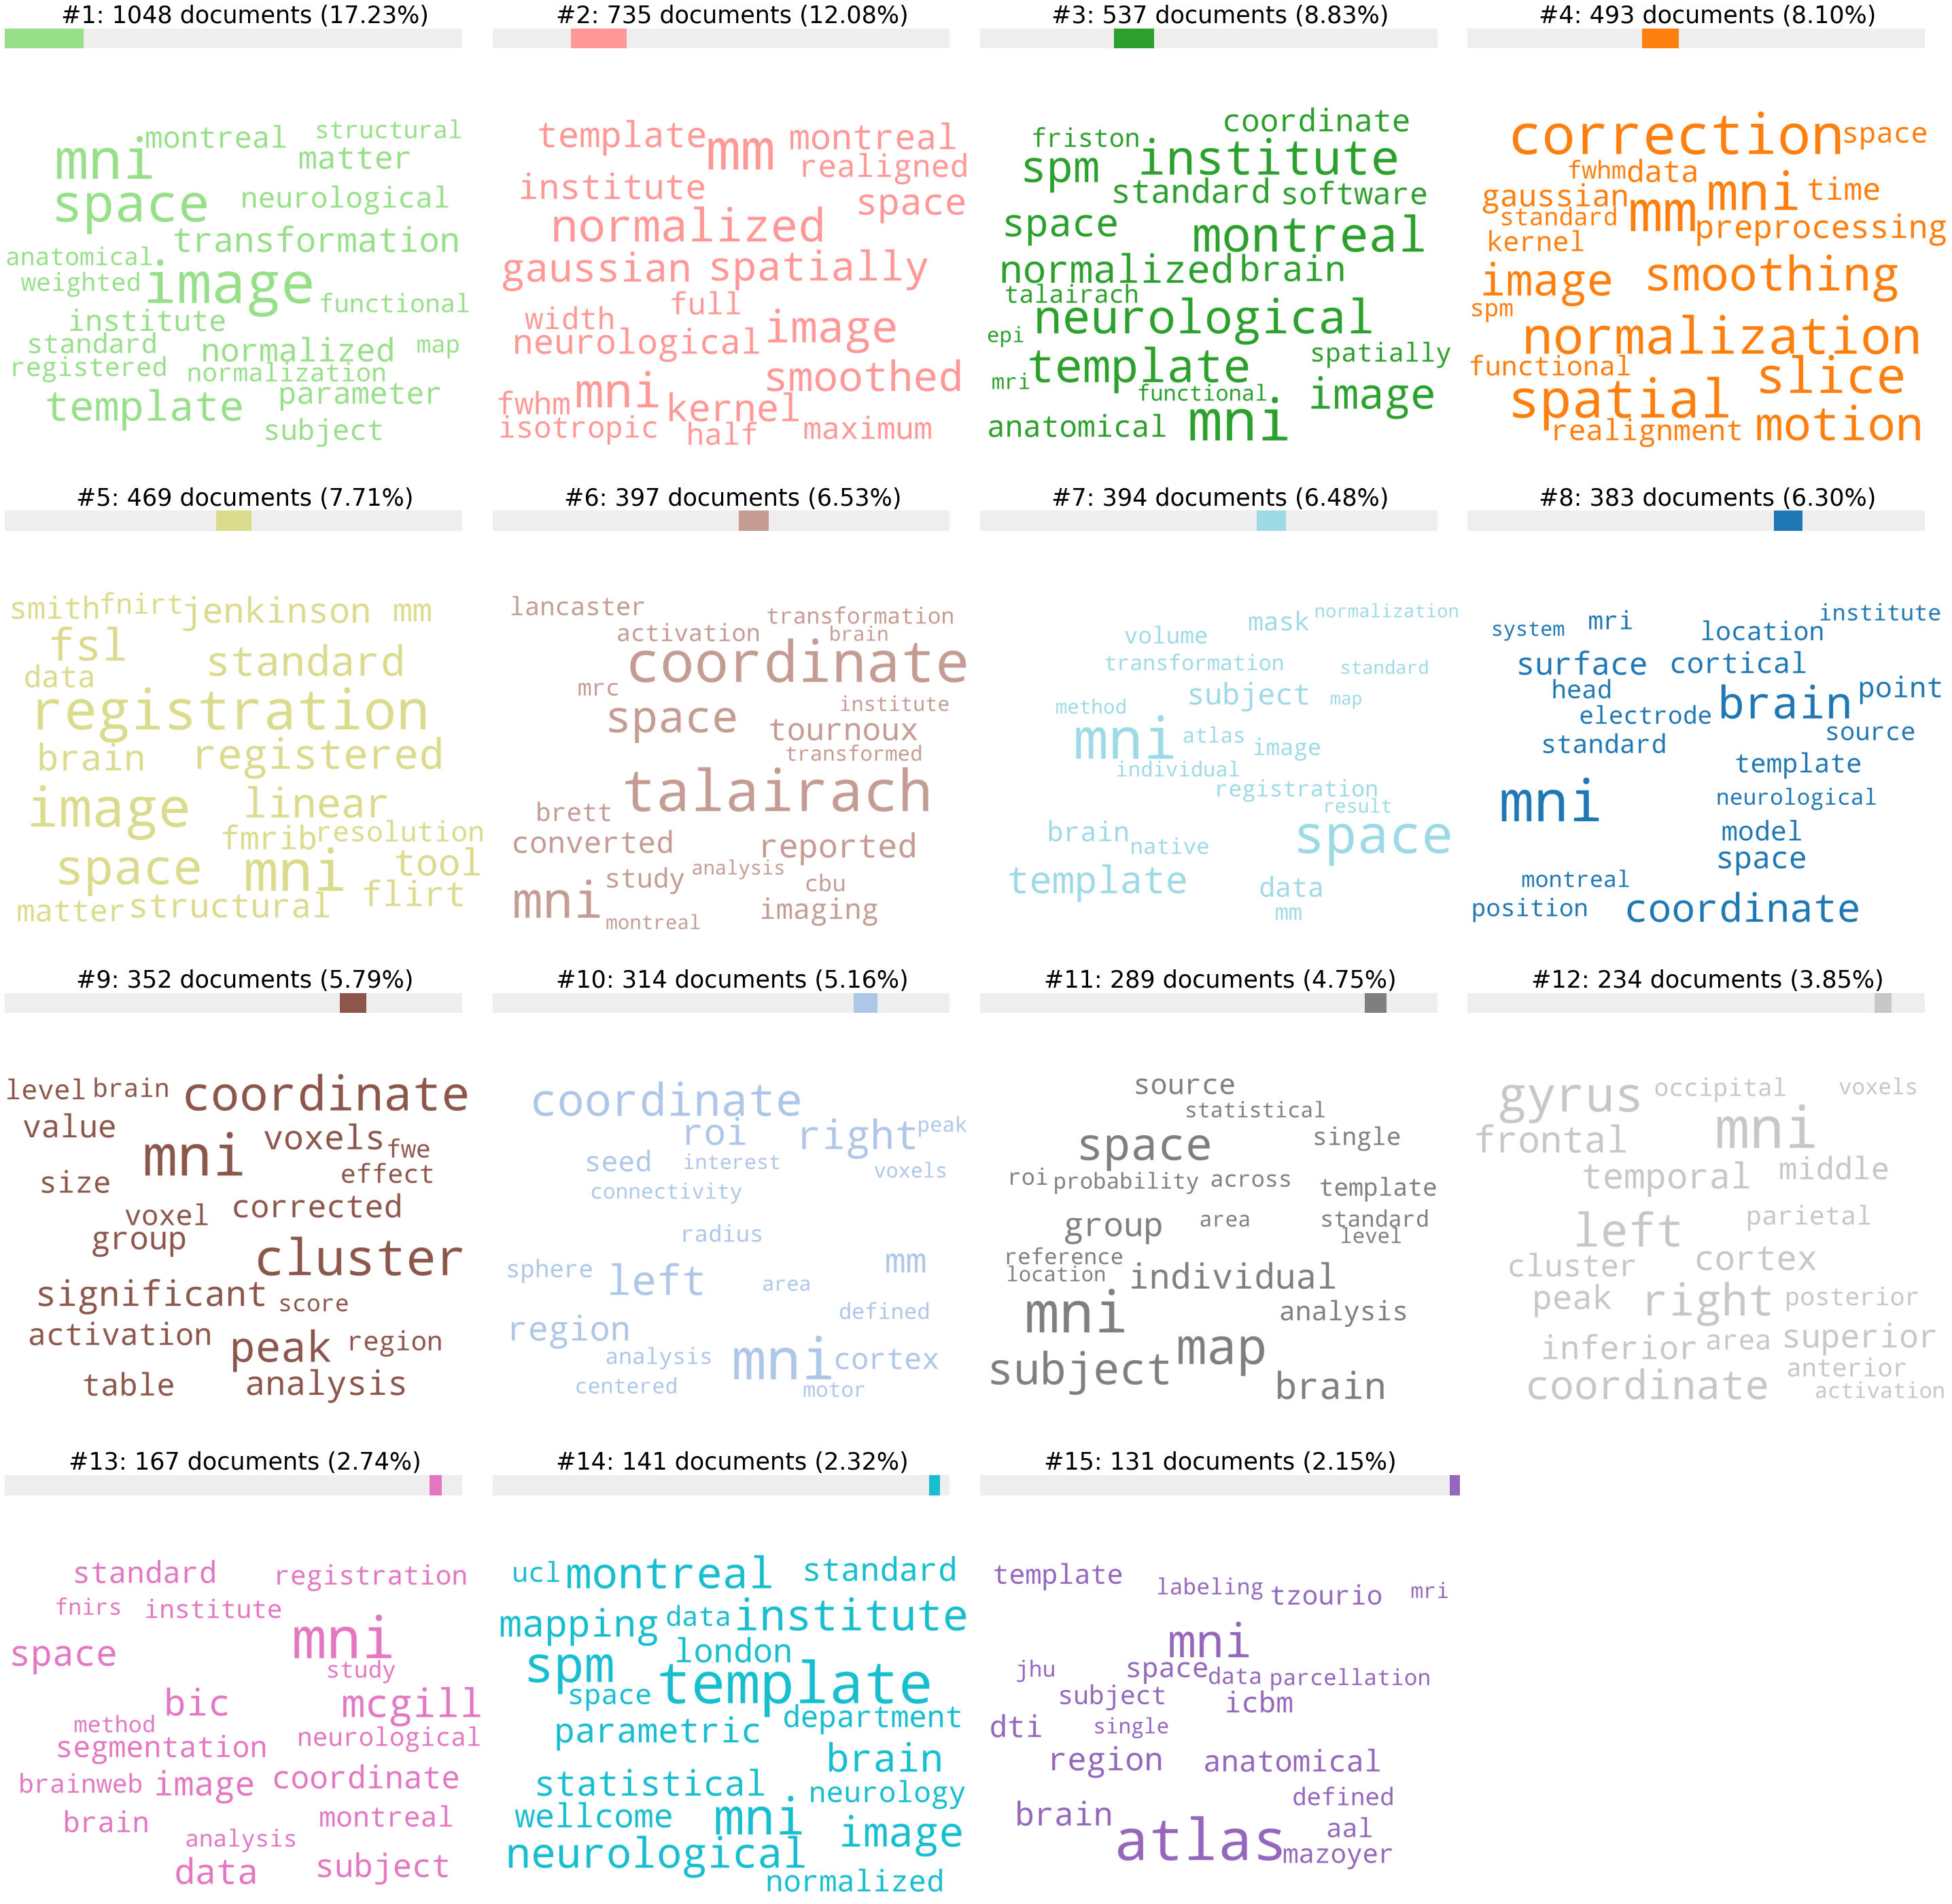

In [24]:
make_wordcloud_plot(
    lda_model,
    vocabulary,
    stop_words,
    sparse_count,
    corpus,
    f"plots/topics_{n_components}comps_full.pdf",
)

<ipython-input-20-441778576af6>:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=15, hspace=5)


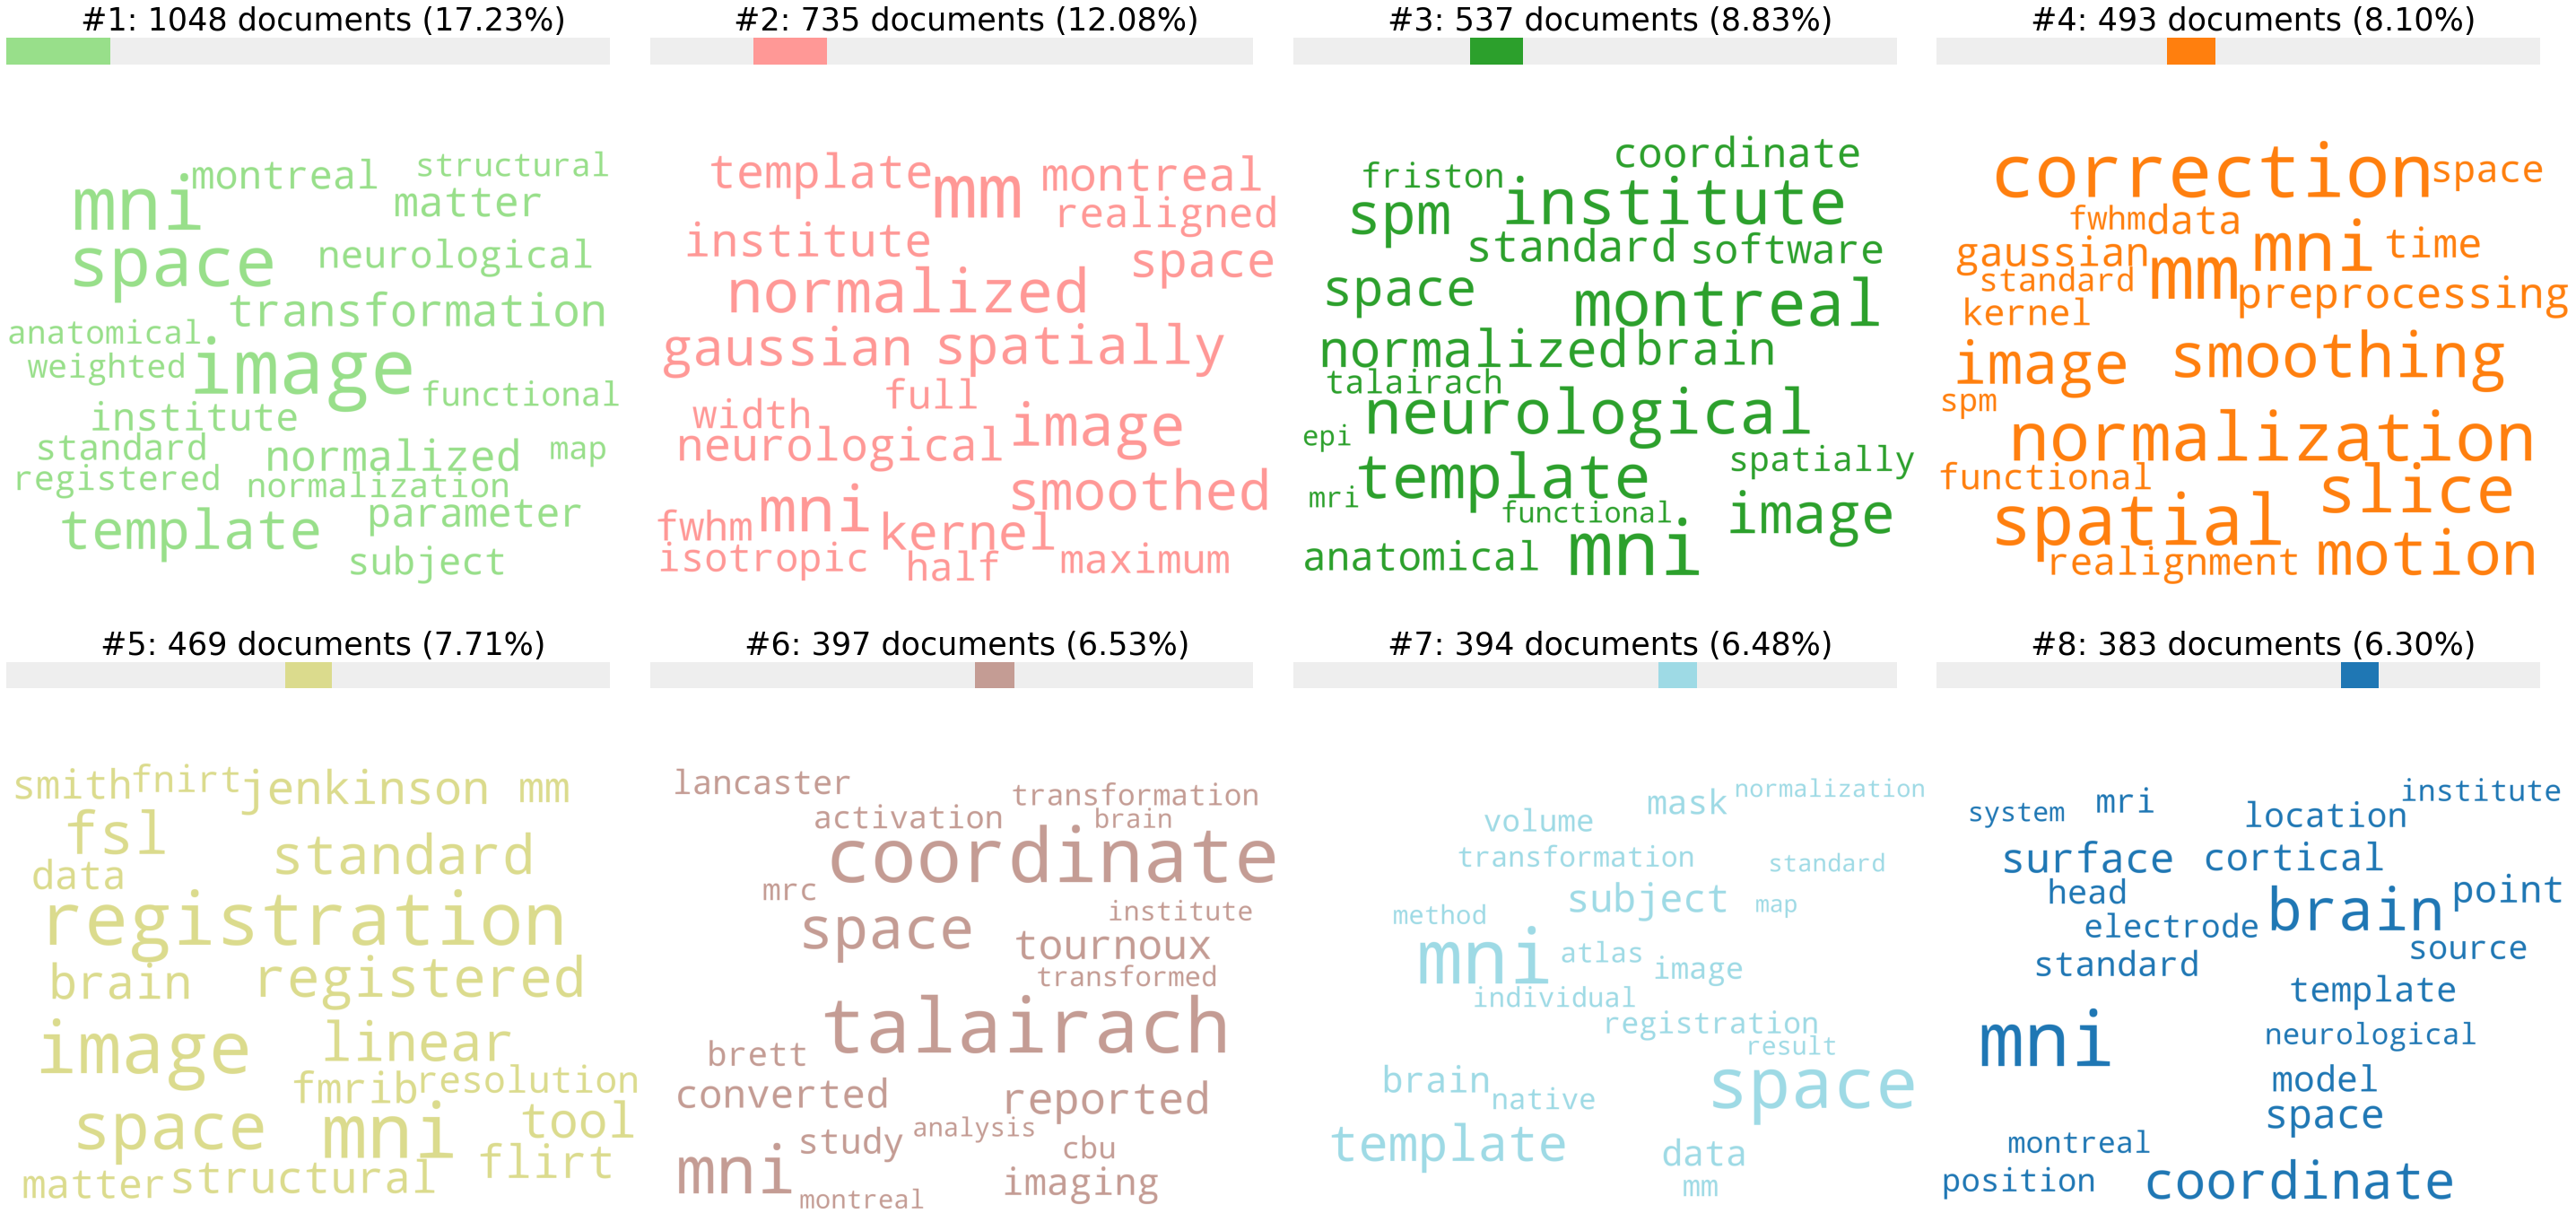

In [22]:
make_wordcloud_plot(
    lda_model,
    vocabulary,
    stop_words,
    sparse_count,
    corpus,
    f"plots/topics_{n_components}comps_clipped.pdf",
    clip_topics=8,
)